In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('billboard-lyrics-spotify.csv')

In [3]:
df.head()

,artist_all,artist_base,rank,song,year,artist_featured,song_clean,artist_clean,lyrics,acousticness,...,speechiness,tempo,time_signature,valence,duration_min,num_words,words_per_sec,num_uniq_words,decade,uniq_ratio
0,percy faith,percy faith,1,theme from a summer place,1960,NaN,theme from a summer place,percy faith,theres a summer place where it may rain or sto...,0.631,...,0.0253,92.631,4.0,0.749,2.414883,104.0,0.717771,58.0,1960,1.793103
1,jim reeves,jim reeves,2,he'll have to go,1960,NaN,hell have to go,jim reeves,put your sweet lips a little closer to the pho...,0.909,...,0.0379,81.181,3.0,0.200,2.310667,152.0,1.096365,69.0,1960,2.202899
2,the everly brothers,the everly brothers,3,cathy's clown,1960,NaN,cathys clown,the everly brothers,dont want your love any more dont want your k...,0.412,...,0.0339,119.809,4.0,0.866,2.400217,121.0,0.840202,64.0,1960,1.890625
3,johnny preston,johnny preston,4,running bear,1960,NaN,running bear,johnny preston,on the bank of the river stood running bear yo...,0.854,...,0.0530,119.987,4.0,0.822,2.636667,220.0,1.390645,89.0,1960,2.471910
4,mark dinning,mark dinning,5,teen angel,1960,NaN,teen angel,mark dinning,teen angel teen angel teen angel that fateful ...,0.936,...,0.0459,101.517,4.0,0.282,2.664883,109.0,0.681706,73.0,1960,1.493151


In [4]:
df.iloc[1]

artist_all                                                 jim reeves
artist_base                                                jim reeves
rank                                                                2
song                                                 he'll have to go
year                                                             1960
artist_featured                                                   NaN
song_clean                                            hell have to go
artist_clean                                               jim reeves
lyrics              put your sweet lips a little closer to the pho...
acousticness                                                    0.909
danceability                                                    0.554
energy                                                          0.186
explicit                                                          0.0
instrumentalness                                              0.00144
key                 

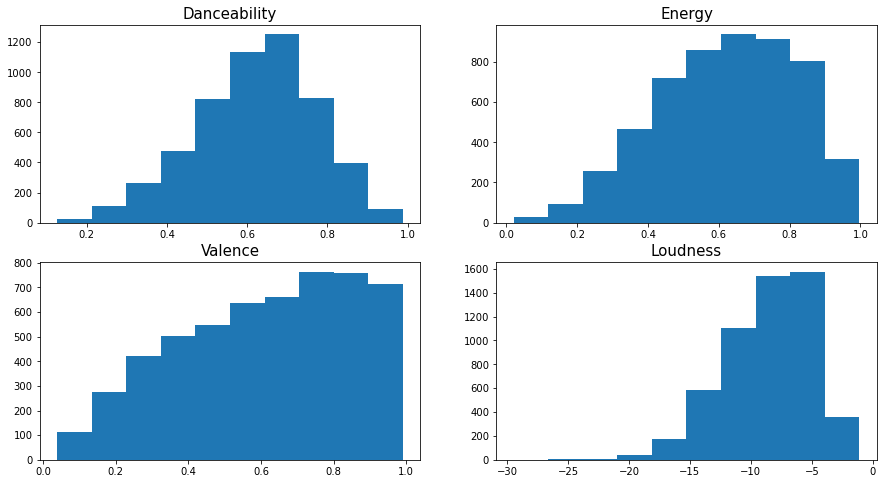

In [8]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [10]:
df[['valence','loudness','danceability','energy']].describe()

,valence,loudness,danceability,energy
count,5396.000000,5396.000000,5396.000000,5396.000000
mean,0.612340,-8.546783,0.621631,0.620164
std,0.239058,3.550926,0.150753,0.193300
min,0.037900,-29.467000,0.126000,0.020400
25%,0.425000,-10.878500,0.526000,0.480000
50%,0.637000,-8.017000,0.634000,0.635000
75%,0.815000,-5.796250,0.727000,0.774000
max,0.991000,-1.097000,0.988000,0.997000


In [13]:
df.columns

Index(['artist_all', 'artist_base', 'rank', 'song', 'year', 'artist_featured',
       'song_clean', 'artist_clean', 'lyrics', 'acousticness', 'danceability',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'release_date', 'speechiness', 'tempo',
       'time_signature', 'valence', 'duration_min', 'num_words',
       'words_per_sec', 'num_uniq_words', 'decade', 'uniq_ratio'],
      dtype='object')

In [144]:
cols = ['danceability','energy','loudness','valence','acousticness','instrumentalness','tempo']
# X = pd.DataFrame(MinMaxScaler().fit_transform(df[cols]))
# X.columns = cols
# X.fillna(0,inplace=True)

In [129]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [130]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

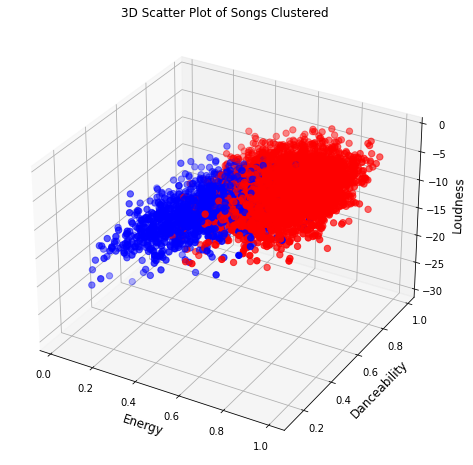

In [131]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [132]:
df.columns

Index(['artist_all', 'artist_base', 'rank', 'song', 'year', 'artist_featured',
       'song_clean', 'artist_clean', 'lyrics', 'acousticness', 'danceability',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'release_date', 'speechiness', 'tempo',
       'time_signature', 'valence', 'duration_min', 'num_words',
       'words_per_sec', 'num_uniq_words', 'decade', 'uniq_ratio', 'kmeans'],
      dtype='object')

In [145]:
cols.append('kmeans')
df[cols].groupby(['kmeans']).mean()


,danceability,energy,loudness,valence,acousticness,instrumentalness,tempo
kmeans,,,,,,,
0,0.510092,0.401052,-11.275784,0.405975,0.566179,0.035074,116.770446
1,0.661048,0.697598,-7.582358,0.685270,0.162523,0.023917,120.267821


In [134]:
np.unique(df['kmeans'],return_counts=True)

(array([0, 1], dtype=int32), array([1579, 3987]))

In [136]:
df[df['kmeans']==0]

,artist_all,artist_base,rank,song,year,artist_featured,song_clean,artist_clean,lyrics,acousticness,...,tempo,time_signature,valence,duration_min,num_words,words_per_sec,num_uniq_words,decade,uniq_ratio,kmeans
0,percy faith,percy faith,1,theme from a summer place,1960,NaN,theme from a summer place,percy faith,theres a summer place where it may rain or sto...,0.631,...,92.631,4.0,0.749,2.414883,104.0,0.717771,58.0,1960,1.793103,0
1,jim reeves,jim reeves,2,he'll have to go,1960,NaN,hell have to go,jim reeves,put your sweet lips a little closer to the pho...,0.909,...,81.181,3.0,0.200,2.310667,152.0,1.096365,69.0,1960,2.202899,0
3,johnny preston,johnny preston,4,running bear,1960,NaN,running bear,johnny preston,on the bank of the river stood running bear yo...,0.854,...,119.987,4.0,0.822,2.636667,220.0,1.390645,89.0,1960,2.471910,0
4,mark dinning,mark dinning,5,teen angel,1960,NaN,teen angel,mark dinning,teen angel teen angel teen angel that fateful ...,0.936,...,101.517,4.0,0.282,2.664883,109.0,0.681706,73.0,1960,1.493151,0
5,brenda lee,brenda lee,6,i'm sorry,1960,NaN,im sorry,brenda lee,im sorry so sorry that i was such a fool i did...,0.928,...,101.501,3.0,0.339,2.669550,114.0,0.711730,44.0,1960,2.590909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,rae sremmurd,rae sremmurd,64,swang,2017,NaN,swang,rae sremmurd,mmm its nasty uhmm know some young niggas lik...,0.215,...,140.009,4.0,0.160,3.468667,353.0,1.696137,134.0,2010,2.634328,0
5533,drake,drake,65,passionfruit,2017,NaN,passionfruit,drake,hold on hold on fuck that fuck that shit hold...,0.304,...,111.963,4.0,0.372,4.982350,231.0,0.772728,105.0,2010,2.200000,0
5535,kesha,kesha,67,praying,2017,NaN,praying,kesha,well you almost had me fooled told me that i ...,0.480,...,73.483,4.0,0.325,3.837817,283.0,1.228997,123.0,2010,2.300813,0
5544,sam smith,sam smith,77,too good at goodbyes,2017,NaN,too good at goodbyes,sam smith,you must think that im stupid you must think ...,0.615,...,91.500,4.0,0.523,3.350000,354.0,1.761194,80.0,2010,4.425000,0


In [139]:
df[cols]

,danceability,energy,loudness,valence,acousticness,instrumentalness,kmeans
0,0.466,0.3890,-12.825,0.749,0.63100,0.843000,0
1,0.554,0.1860,-15.846,0.200,0.90900,0.001440,0
2,0.498,0.5820,-8.961,0.866,0.41200,0.000000,1
3,0.772,0.2970,-14.679,0.822,0.85400,0.000008,0
4,0.570,0.0636,-18.548,0.282,0.93600,0.000000,0
...,...,...,...,...,...,...,...
5561,0.765,0.5230,-4.333,0.394,0.18400,0.000036,1
5562,0.792,0.6120,-5.212,0.420,0.08050,0.000004,1
5563,0.742,0.5990,-6.256,0.154,0.00419,0.000010,1
5564,0.763,0.7260,-6.405,0.349,0.25900,0.000000,1
